<a href="https://www.kaggle.com/code/dharnidhardeshmukh/sentiment-analysis-nlp?scriptVersionId=112442501" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Libraries importing

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import re
    


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import seaborn as sns

# 2. Loading data

In [3]:
df = pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv', encoding = 'latin',header = None)
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


# 2. EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.columns = ['Sentiment', 'Id', 'Date', 'Query','User_name', 'Text']

In [6]:
df.shape

(1600000, 6)

In [7]:
df.head()

,Sentiment,Id,Date,Query,User_name,Text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [8]:
df = df.drop(['Id', 'Date', 'Query', 'User_name'], axis = 1)
df.head()

,Sentiment,Text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
sentiment = { 0: 'Negative', 4: 'Positive'}
def label_decoder(label):
    return sentiment[label]

df.Sentiment = df.Sentiment.apply(lambda x : label_decoder(x))
df.head(10)

,Sentiment,Text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
5,Negative,@Kwesidei not the whole crew
6,Negative,Need a hug
7,Negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,Negative,@Tatiana_K nope they didn't have it
9,Negative,@twittera que me muera ?


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

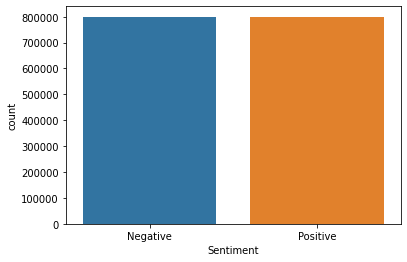

In [10]:
plt.figure()
sns.countplot(df['Sentiment'])

# 3. Preprocessing

In [11]:
stop_words = stopwords.words('english')
stop_words[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
stemmer = SnowballStemmer('english')
text_cleaning_re = '@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+'

In [13]:
def preprocess(text, stem = False):
    text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
    tokens =[]
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return ' '.join(tokens)

In [14]:
df.Text[0]

"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

In [15]:
preprocess(df.Text[0], True)

'awww bummer shoulda got david carr third day'

In [16]:
df.Text = df.Text.apply(lambda x : preprocess(x))
df.head()

,Sentiment,Text
0,Negative,awww bummer shoulda got david carr third day
1,Negative,upset update facebook texting might cry result...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,behaving mad see


In [17]:
Train_size = 0.8
Max_NB_words = 100000
Max_sq_length = 30

In [18]:
train_data, test_data = train_test_split(df, test_size = 1 - Train_size, random_state = 5)
print('size of training data :', len(train_data))
print('size of testing data :',len(test_data))


size of training data : 1280000
size of testing data : 320000


In [19]:
train_data.head()

,Sentiment,Text
887460,Positive,ahaha honestly im even tired suprise woke sooo...
545899,Negative,wtf goldfish hate keep dying poor
835785,Positive,serious finish things
277841,Negative,come think one one tanga ako
1124354,Positive,started following mind direct messaging tell know


In [20]:
from keras.preprocessing.text import Tokenizer

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.Text)

word_index = tokenizer.word_index
vocab_size = len(word_index)
print('VOCAB_SIZE :', vocab_size)

VOCAB_SIZE : 290739


In [22]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.Text), maxlen = Max_sq_length)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.Text), maxlen = Max_sq_length)

print('training x shape :', x_train.shape)
print('testing x shape :', x_test.shape)

training x shape : (1280000, 30)
testing x shape : (320000, 30)


In [23]:
encoder = LabelEncoder()
encoder.fit(train_data.Sentiment.to_list())

y_train = encoder.transform(train_data.Sentiment.tolist())
y_test = encoder.transform(test_data.Sentiment.tolist())

print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

y_train shape : (1280000,)
y_test shape : (320000,)


In [24]:
y_train = y_train.reshape(1280000,1)
y_test = y_test.reshape(320000,1)

print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

y_train shape : (1280000, 1)
y_test shape : (320000, 1)


In [25]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2022-11-29 13:06:39--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-11-29 13:06:40--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-11-29 13:06:41--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

here we are using word embeddings. 
word embeddings are multidiamentional representaion of word vectors which keeps words with similar meanings close to eachother pointing in the same direction.

In [26]:
GLOVE_EMB = './glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 20
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [27]:
## File Handling
embeddings_index = {}
file = open(GLOVE_EMB)
for line in file:
    values = line.split()
    word = value = values[0]
    coef = np.asarray(values[1:],dtype = 'float32')
    embeddings_index[word] = coef
    
file.close()
print('Found {} word vectors'.format(len(embeddings_index)))

Found 400000 word vectors


In this embedded file first we have a word and  then we have vector associateed with that word.
so we are doing that, first we read a line, split that line

In [28]:
list(embeddings_index.items())[0]

('the',
 array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
         2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
        -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
         2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
        -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
        -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
         9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
        -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
         1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
         2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
         1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
         2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
        -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
        -4.4640e-01,  1.7197e-01,  4.6246e-

this word embedding is very huge, so we need to extract word vectors which are in our vocablory

In [29]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector


# 4. Training

In [30]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                           EMBEDDING_DIM,
                                           weights = [embedding_matrix],
                                           input_length = Max_sq_length,
                                           trainable = False)

In [31]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [32]:
sequence_input = Input(shape = (Max_sq_length), dtype = 'int32')
embedding_sequences = embedding_layer(sequence_input)
x= SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation = 'relu')(x)
x = Bidirectional(LSTM(64, dropout = 0.2, recurrent_dropout = 0.2))(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)
 # here we arranged layer for our neural network.

2022-11-29 13:10:17.255251: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:10:17.362725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:10:17.363586: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-29 13:10:17.365563: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [33]:
model.summary()
#here is our model's structure look like

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 30, 300)           87221700  
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 30, 300)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 26, 64)            96064     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 512)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

In [34]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [35]:
model.compile(optimizer = Adam(learning_rate = LR),
             loss ='binary_crossentropy',
             metrics = ['accuracy'])

LR_reduction = ReduceLROnPlateau(factor = 0.1,
                                min_lr = 0.0001,
                                monitor = 'val_loss',
                                verbose = 1)

In [36]:
history = model.fit(x_train,
                   y_train,
                   batch_size = BATCH_SIZE,
                   epochs = EPOCHS,
                   validation_data = (x_test, y_test),
                   callbacks = [LR_reduction])

2022-11-29 13:10:22.057921: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 153600000 exceeds 10% of free system memory.
2022-11-29 13:10:22.258035: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-11-29 13:10:26.409481: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1250/1250 [==============================] - 144s 108ms/step - loss: 0.5192 - accuracy: 0.7393 - val_loss: 0.4833 - val_accuracy: 0.7657
Epoch 2/20
1250/1250 [==============================] - 133s 107ms/step - loss: 0.4879 - accuracy: 0.7621 - val_loss: 0.4737 - val_accuracy: 0.7711
Epoch 3/20
1250/1250 [==============================] - 135s 108ms/step - loss: 0.4780 - accuracy: 0.7687 - val_loss: 0.4669 - val_accuracy: 0.7751
Epoch 4/20
1250/1250 [==============================] - 133s 107ms/step - loss: 0.4710 - accuracy: 0.7729 - val_loss: 0.4634 - val_accuracy: 0.7773
Epoch 5/20
1250/1250 [==============================] - 133s 107ms/step - loss: 0.4666 - accuracy: 0.7756 - val_loss: 0.4616 - val_accuracy: 0.7785
Epoch 6/20
1250/1250 [==============================] - 134s 108ms/step - loss: 0.4632 - accuracy: 0.7784 - val_loss: 0.4621 - val_accuracy: 0.7804
Epoch 7/20
1250/1250 [==============================] - 134s 107ms/step - loss: 0.4608 - accuracy: 0.7796 - val_loss: 0.459

# 5. Verification & Prediction

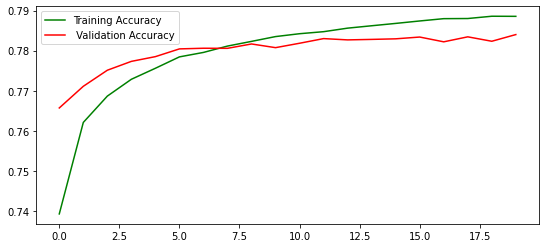

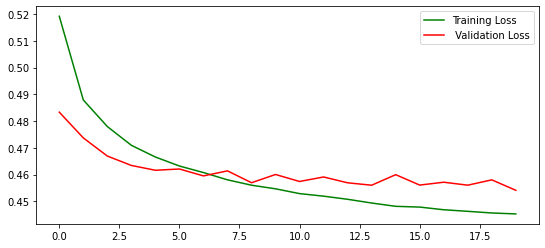

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))


plt.figure(figsize = (9,4))
plt.plot(acc, color = 'green', label = 'Training Accuracy')
plt.plot(val_acc, color = 'red', label = ' Validation Accuracy')
plt.legend()

plt.figure(figsize= (9,4))
plt.plot(loss,color = 'green', label = 'Training Loss')
plt.plot(val_loss, color = 'red', label = ' Validation Loss')
plt.legend()


In [38]:
def decode_sentiment(score):
    return 'Positive' if score > 0.5 else 'Negative'

scores = model.predict(x_test, verbose = 1, batch_size = 10000)
y_pred_D = [decode_sentiment(score) for score in scores]

32/32 [==============================] - 2s 39ms/step


In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
  """
  This Function prints and plots the Confusion Matrix.
  Normalization can be applied by setting 'normalize=true'.
  """
  plt.imshow(cm, interpolation = 'nearest', cmap =cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes,rotation = 30)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm= cm.astype('float')/ cm.sum(axis = 1[:, np.newaxis])
    print("Normalized Confusion Matrix")
  else:
    print('Confusion matrix, without Normalization')

  #print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
             horizontalalignment= 'center',
             color = "white" if cm[i,j]>thresh else "black")
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('predicted label')

Confusion matrix, without Normalization


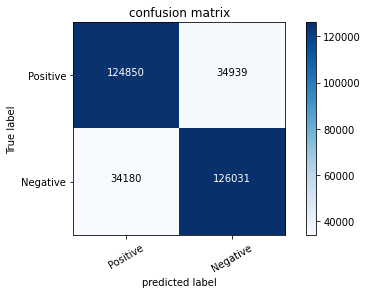

In [41]:
# here we areplotting a confusion matrix to get better idea about predicted accuracy in detail.
cnf_matrix = confusion_matrix(test_data.Sentiment.tolist(), y_pred_D)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = test_data.Sentiment.unique(), title = 'confusion matrix')
plt.show()

here we can see a confusion matrix.
 in this confusion matrix, True positive are :125727 & True Negative are:124932
 False positive :35279 & false Negative:34062.
 so 250659 are correctly predicted and 69341 are predicted wrong. 
 
In Confusion Matrix 
1. True Positive are those which are actually Positive and predicted as a Positive.
2. True Negative are those which are actually Negative and predicted as a Negative.
3. False Positive are those which are actually Negative but predicted as a Positive.
4. False Negative are those which are actually Positive and predicted as a Negative.

In [42]:
accuracy = max(acc)
print('Accuracy of model :', accuracy)

Accuracy of model : 0.7885711193084717


here is our model's accuracy 

In [43]:
from sklearn.metrics import classification_report
print(classification_report(list(test_data.Sentiment), y_pred_D))

              precision    recall  f1-score   support

    Negative       0.79      0.78      0.78    159789
    Positive       0.78      0.79      0.78    160211

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [44]:
# here we are making a function for the sentiment predictions.
import time
def pred(text):
    start_at = time.time()
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=Max_sq_length) 
    score = model.predict([x_test])[0]
    label = decode_sentiment(score)

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}
 # Based on score it predicts Its sentiment (Negative or Positive)

In [45]:
pred("its very honored to see this")

{'label': 'Positive',
 'score': 0.8997042179107666,
 'elapsed_time': 0.45819592475891113}

we can see model can detect sentiments of any sentences or tweets.

## Summary
 We took '**16 million tweets**' data from twitter to make this NLP project ( Natural Language Processing). 
 In this project we trained a neural network to detect sentiments of the tweets or sentences in english language.
 As we can see in prediction section we can detect sentiments of any sentences as we want. 
 In this NLP project, first we cleaned data and preprocessed it for importing to neural network structure to train it.

Further we can improve this model by adding Neural Sentiment in Prediction section, as sentence having score around 0.5 are can be specified as Neutral sentiments.

***not completed, still working on it.......****